In [2]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Declare a Base using `automap_base()'
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
# get the most recent date in date format
recent_date_fmt = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date_fmt

'2017-08-23'

In [9]:
# break out the latest date by y, m, d in integer format that is used in the date function
recent_date = recent_date_fmt.replace("-0", "-")
rd_year = int(recent_date[0:4])
rd_month = int(recent_date[5:6])
rd_day = int(recent_date[7:9])
print(f"new formated date = {rd_year,rd_month,rd_day}")

new formated date = (2017, 8, 23)


In [10]:
# get the prev date from 12 months back from the latest date of Measurment date
one_year_ago = dt.date(rd_year,rd_month,rd_day) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [11]:
# Display the row's columns and data in dictionary format for Measurement table
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1087a77f0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [12]:
# Select only the date and prcp values
# Sort the DataFrame values by date.

prcp_results = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= one_year_ago).\
                        order_by(Measurement.date).all() 
 

In [13]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
prcp_df = pd.DataFrame(prcp_results, columns=['Date', 'Precipitation'])
#prcp_df.set_index('Date', inplace=True, )
prcp_df.head(5)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


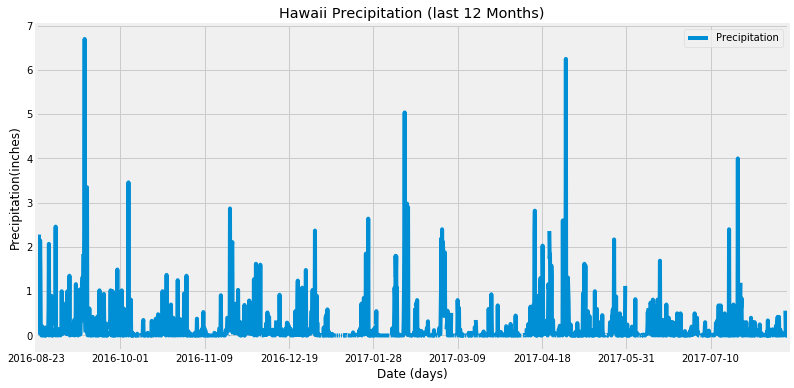

In [14]:
# Plot the results using the DataFrame plot method
prcp_df.plot("Date","Precipitation",figsize=(12,6))
plt.title("Hawaii Precipitation (last 12 Months)")
plt.xlabel("Date (days)")
plt.ylabel("Precipitation(inches)")
plt.grid(True)
# Save an image of thechart and print the final product 
plt.savefig("images/Precipitation.png")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df_stats = prcp_df.describe()
prcp_df_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
station_counts = session.query(Measurement).group_by(Measurement.station).count()
station_counts 
 

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# retrieve the most active station from the list
most_active_station = most_active_stations[0][0]
print(most_active_station)


USC00519281


In [19]:
# Using the Measurment station from the previous query to calculate the lowest temperature recorded, 
# highest temperature recorded, and calculate the average temperature. 

most_active_station_stats = session.query(func.min(Measurement.tobs),  \
                                          func.max(Measurement.tobs),  \
                                          func.avg(Measurement.tobs)). \
                                filter(Measurement.station == most_active_station).all()
print(most_active_station_stats)

[(54.0, 85.0, 71.66378066378067)]


In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_tobs = session.query(Measurement.station, Measurement.tobs).\
                                filter(Measurement.station == most_active_station).\
                                filter(Measurement.date >= one_year_ago).\
                                order_by(Measurement.tobs).all() 
                              
most_active_station_tobs

[('USC00519281', 59.0),
 ('USC00519281', 59.0),
 ('USC00519281', 59.0),
 ('USC00519281', 60.0),
 ('USC00519281', 60.0),
 ('USC00519281', 61.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 64.0),
 ('USC00519281', 64.0),
 ('USC00519281', 64.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 65.0),
 ('USC00519281', 66.0),
 ('USC00519281', 66.0),
 ('USC00519281', 66.0),
 ('USC00519281', 66.0),
 ('USC00519281', 66.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281',

In [21]:
# Load the query results into a Pandas DataFrame and set the index to the station column.
most_active_station_tobs_df = pd.DataFrame(most_active_station_tobs, columns=['Station', 'TOBS'])
most_active_station_tobs_df.set_index('Station', inplace=True, )
most_active_station_tobs_df.head()

,TOBS
Station,
USC00519281,59.0
USC00519281,59.0
USC00519281,59.0
USC00519281,60.0
USC00519281,60.0


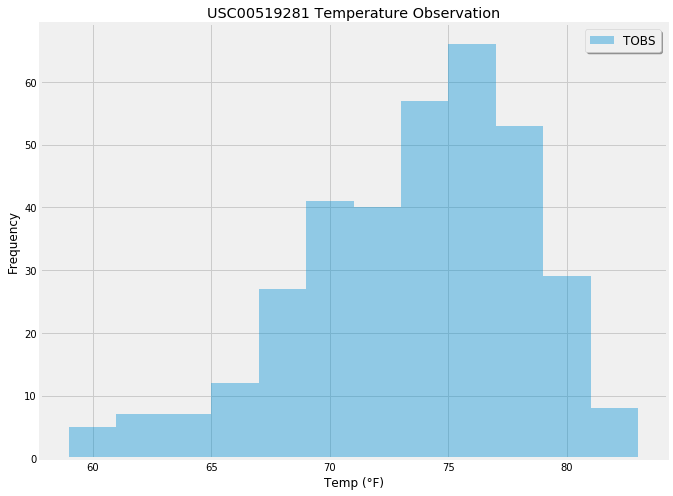

In [22]:
# Plot the results using the DataFrame plot method with 12 bins by the station using the by keyword in the hist method:
most_active_station_tobs_df.plot.hist(by="Station",bins=12, alpha=0.4,figsize=(10,8))
plt.title(f"{most_active_station} Temperature Observation")
plt.xlabel("Temp (°F)")
plt.legend(loc="best",shadow=True,fontsize="large")
plt.grid(True)
#Save an image of thechart and print the final product 
plt.savefig("images/ActiveStationTobs.png")
plt.show()

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip_weather = calc_temps("2017-01-01", "2017-01-15")
my_trip_weather

[(60.0, 68.5505617977528, 81.0)]

In [25]:
# convert my trip data to a dataframe
my_trip_weather_df = pd.DataFrame(my_trip_weather, columns=["MinTemp", "AvgTemp", "MaxTemp"])
my_trip_weather_df

,MinTemp,AvgTemp,MaxTemp
0,60.0,68.550562,81.0


In [26]:
# calculate the peak-to-peak (tmax-tmin) value (yerr)
yerr_tmin_tmax =  my_trip_weather_df["MaxTemp"] - my_trip_weather_df["MinTemp"]
yerr_tmin_tmax

0    21.0
dtype: float64

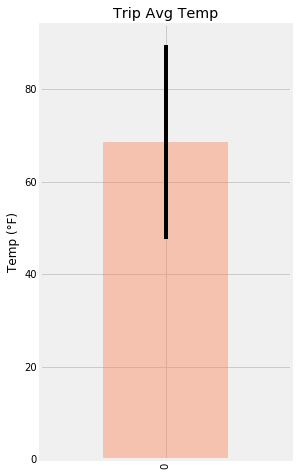

In [27]:
# Plot the results from previous query as a bar chart. 
# Use "Trip Avg Temp" as Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

my_trip_weather_df["AvgTemp"].plot(kind="bar", yerr=yerr_tmin_tmax, figsize=(4,8), alpha=0.4, color="coral")
plt.title("Trip Avg Temp")
plt.ylabel("Temp (°F)")
plt.grid(True)
plt.savefig("images/MyTripWeather.png")
plt.show()

In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
my_trip_weather_prcp = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
                        filter(Station.station == Measurement.station).\
                        filter(Measurement.date >= "2017-01-01").\
                        filter(Measurement.date <= "2017-01-15").\
                        group_by(Measurement.station).\
                        order_by(func.sum(Measurement.prcp).desc()).all() 
my_trip_weather_prcp

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.64),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.63),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.61),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.35),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.21000000000000002),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [29]:
# convert my trip data to a dataframe
my_trip_weather_prcp_df = pd.DataFrame(my_trip_weather_prcp,\
                        columns=["Station", "Name", "latitude", "longitude","Elavation,","Precipitation"])
my_trip_weather_prcp_df

,Station,Name,latitude,longitude,"Elavation,",Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.64
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.63
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.61
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.35
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.21
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


## Optional Challenge Assignment

In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


<IPython.core.display.Javascript object>


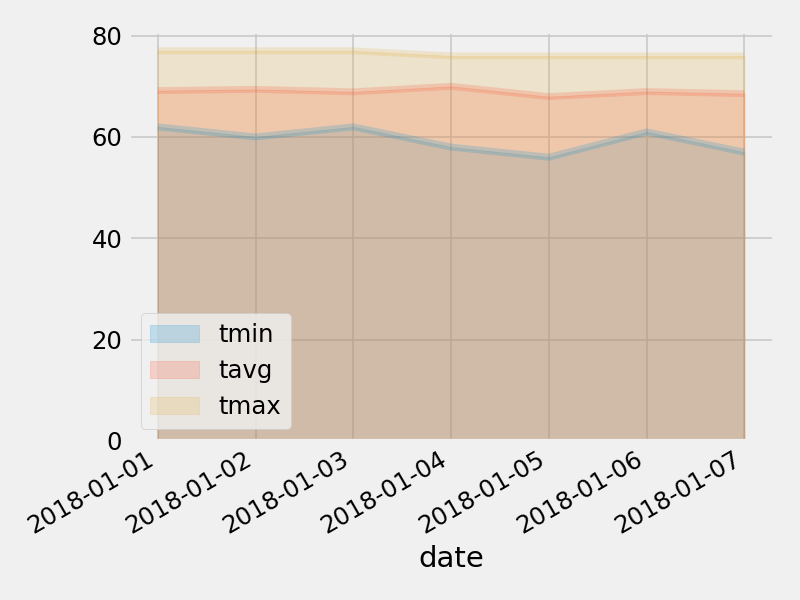

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
